In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 

In [3]:
# read the csv file
sh_dailyindex = pd.read_csv('./sh_index.csv',index_col=0, parse_dates=True,usecols=[0,1, 2, 3, 4, 5])
sh_dailyindex = sh_dailyindex.rename(columns={"vol": "volume"})
sh_dailyindex

,close,open,high,low,volume
date,,,,,
1990-12-19,99.9800,96.0500,99.9800,95.7900,1260.0
1990-12-20,104.3900,104.3000,104.3900,99.9800,197.0
1990-12-21,109.1300,109.0700,109.1300,103.7300,28.0
1990-12-24,114.5500,113.5700,114.5500,109.1300,32.0
1990-12-25,120.2500,120.0900,120.2500,114.5500,15.0
...,...,...,...,...,...
2022-06-13,3255.5511,3256.2750,3272.9906,3229.3089,438578312.0
2022-06-14,3288.9066,3224.2141,3289.1343,3195.8192,450388187.0
2022-06-15,3305.4066,3289.1036,3358.5453,3288.8512,550584131.0


C:\Users\Meng-\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


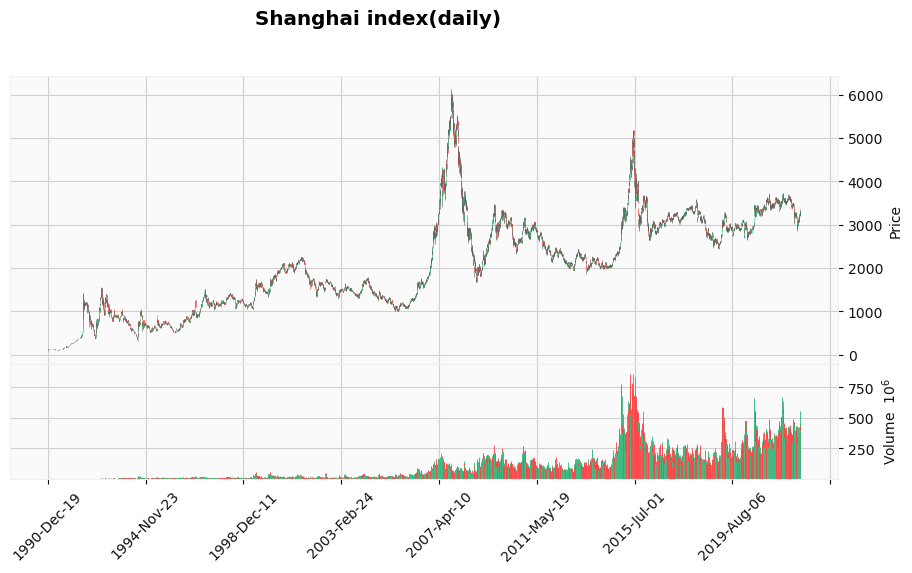

In [4]:
#上证指数日K线
mpf.plot(sh_dailyindex, type='candle', style='yahoo',volume=True, figratio=(10, 5), title = 'Shanghai index(daily)')

In [5]:
# to resample the daily OHLC data into weekly OHLC data
sh_weekly= sh_dailyindex.copy()
sh_weekly.head()

,close,open,high,low,volume
date,,,,,
1990-12-19,99.98,96.05,99.98,95.79,1260.0
1990-12-20,104.39,104.30,104.39,99.98,197.0
1990-12-21,109.13,109.07,109.13,103.73,28.0
1990-12-24,114.55,113.57,114.55,109.13,32.0
1990-12-25,120.25,120.09,120.25,114.55,15.0


In [6]:
sh_weeklyindex = sh_weekly.resample('1W').agg(
    {'open'  :'first',
     'high'  :'max',
     'low'   :'min',
     'close' :'last',
     'volume':'sum'
    })

In [7]:
sh_weeklyindex.head ()

,open,high,low,close,volume
date,,,,,
1990-12-23,96.05,109.13,95.79,109.13,1485.0
1990-12-30,113.57,126.45,109.13,126.45,321.0
1991-01-06,126.56,131.44,126.48,131.44,730.0
1991-01-13,131.99,134.61,131.45,134.60,32063.0
1991-01-20,134.11,135.19,133.65,134.24,18147.0


C:\Users\Meng-\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


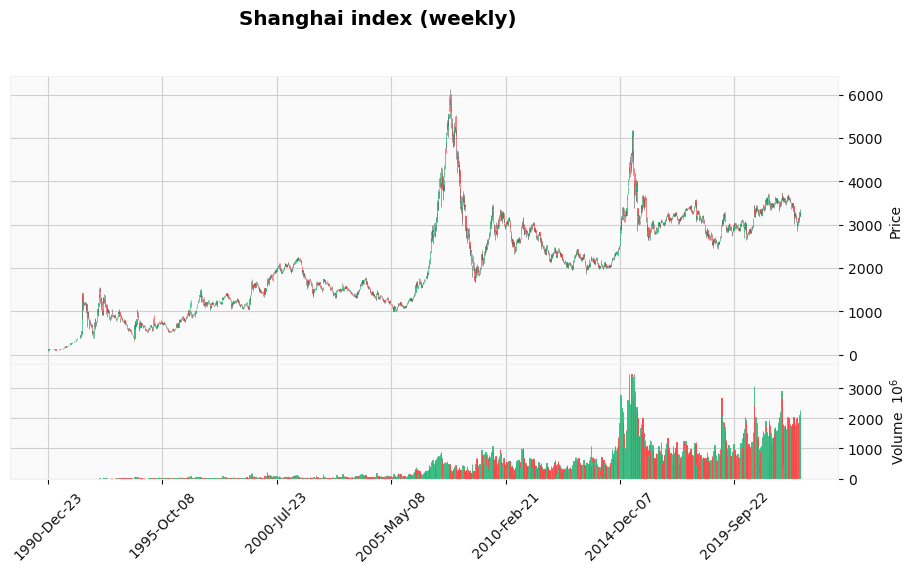

In [32]:
# plot a weekly OHLC index
mpf.plot(sh_weeklyindex, type='candle', style='yahoo',volume=True, figratio=(10, 5), title = 'Shanghai index (weekly)')

In [9]:
# yearly index
sh_yearly= sh_dailyindex.copy()
sh_yearlyindex = sh_yearly.resample('1Y').agg(
    {'open'  :'first',
     'high'  :'max',
     'low'   :'min',
     'close' :'last',
     'volume':'sum'
    })
sh_yearlyindex.head ()

,open,high,low,close,volume
date,,,,,
1990-12-31,96.05,127.61,95.79,127.61,1884.0
1991-12-31,127.61,292.75,104.96,292.75,1258450.0
1992-12-31,293.74,1429.01,292.76,780.39,18243640.0
1993-12-31,784.13,1558.95,750.46,833.80,153907556.0
1994-12-31,837.70,1052.94,325.89,647.87,686408524.0


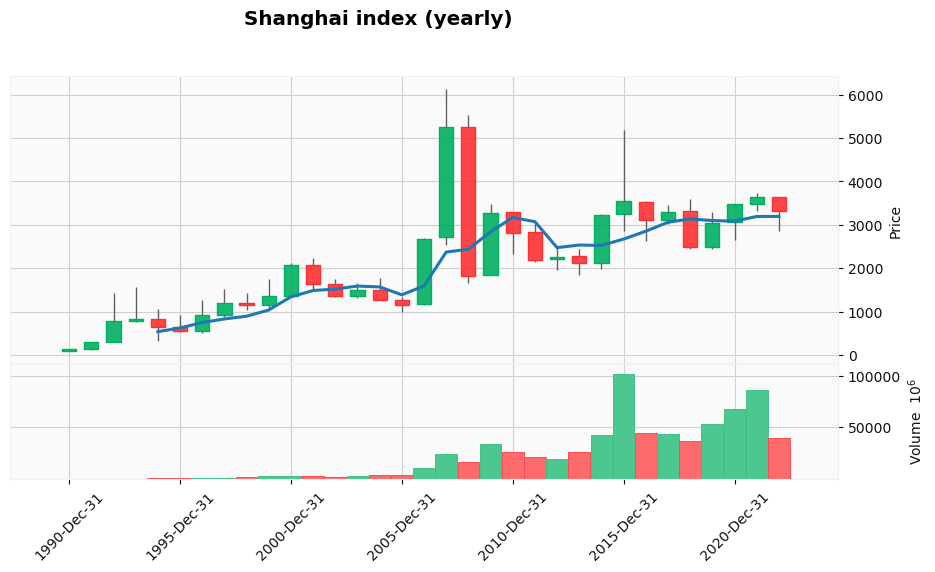

In [10]:
# plot a yearly OHLC index
mpf.plot(sh_yearlyindex, type='candle', style='yahoo',volume=True, figratio=(10, 5), title = 'Shanghai index (yearly)',mav=(5))

**Things could be the same for the Shenzhen index

In [11]:
# read the Shanghai margin_trade csv document
sh_margin = pd.read_csv('./sh_margin_trade.csv',index_col=0, parse_dates=True)
sh_margin 

,financing_balance,financing_purchase,financing_redeem,securities_lending_balance,securities_lending_sell,securities_lending_shares,margin_balance
date,,,,,,,
2010-03-31,5.824813e+06,5.866316e+06,4.150300e+04,2.414200e+04,3100.0,NaN,5.848955e+06
2010-04-01,6.842114e+06,1.054024e+06,3.672300e+04,1.732500e+04,0.0,NaN,6.859439e+06
2010-04-02,6.762781e+06,2.075160e+05,2.868490e+05,1.192900e+04,0.0,NaN,6.774710e+06
2010-04-06,1.009124e+07,3.329461e+06,9.990000e+02,1.026700e+04,0.0,NaN,1.010151e+07
2010-04-07,2.508683e+07,1.514140e+07,1.458120e+05,3.841800e+04,1400.0,NaN,2.512524e+07
...,...,...,...,...,...,...,...
2022-06-13,7.883585e+11,4.645682e+10,4.032807e+10,5.296881e+10,358946148.0,6.719466e+09,8.413273e+11
2022-06-14,7.906073e+11,4.630995e+10,4.403090e+10,5.364555e+10,516131314.0,6.746225e+09,8.442528e+11
2022-06-15,7.936099e+11,6.023321e+10,5.720604e+10,5.363067e+10,536441330.0,6.806673e+09,8.472406e+11


In [12]:
sh_margin2 = sh_margin [['financing_balance', 'securities_lending_balance','margin_balance']]
sh_margin2.tail ()

,financing_balance,securities_lending_balance,margin_balance
date,,,
2022-06-13,7.883585e+11,5.296881e+10,8.413273e+11
2022-06-14,7.906073e+11,5.364555e+10,8.442528e+11
2022-06-15,7.936099e+11,5.363067e+10,8.472406e+11
2022-06-16,7.957567e+11,5.430302e+10,8.500597e+11
2022-06-17,7.939404e+11,5.529007e+10,8.492304e+11


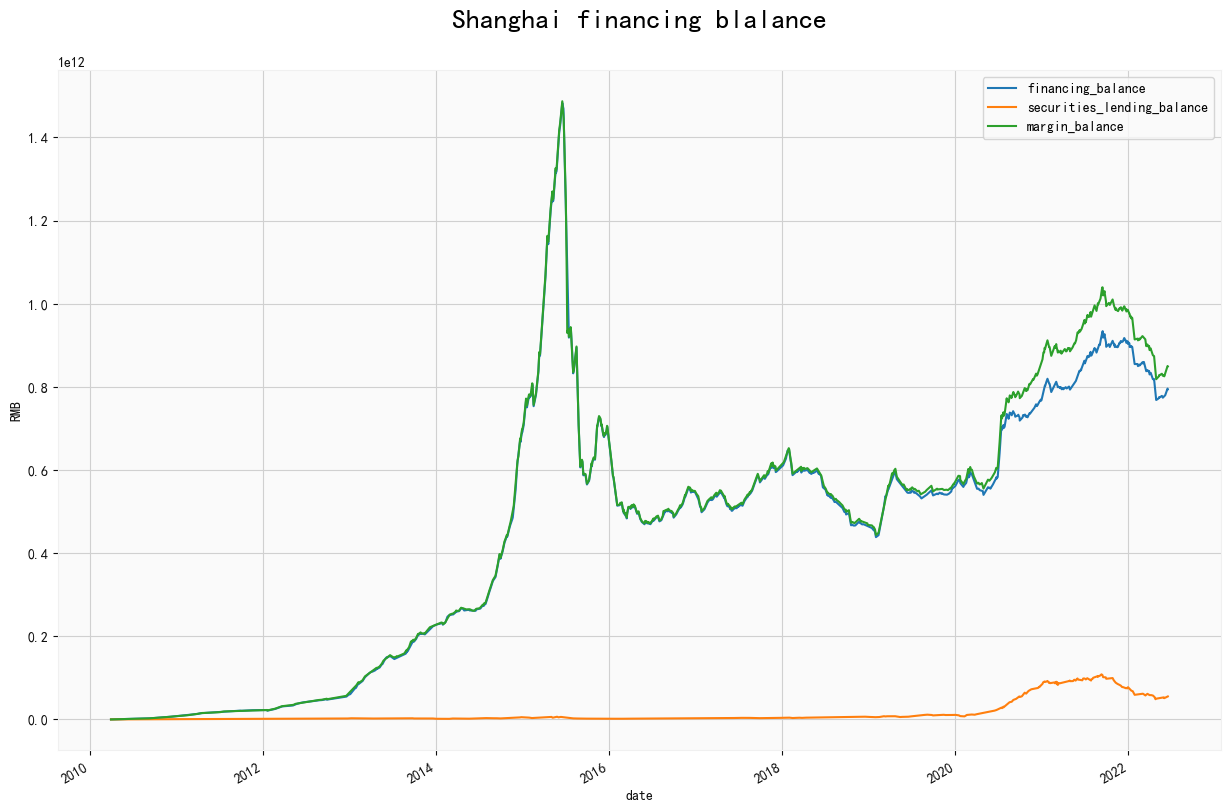

In [31]:
# plot a linechart

sh_margin2.plot (figsize = (15,10))
plt.title ('Shanghai financing blalance',fontsize = 20, pad = 30)
plt.ylabel ('RMB')
plt.show ()

**The same goes for Shenzhen index

In [17]:
#plot an MACD diagram
df = pd.read_csv('./002475_101.csv')

In [18]:
df.rename(columns={"开盘": "open","收盘": "close","最高": "high","最低": "low","成交量": "volume","日期":"date"},inplace = True)
df_test = df[['open', 'close','high','low','volume','date']]

In [19]:
df_test.index = pd.DatetimeIndex(df_test['date'])

In [20]:
df_test

,open,close,high,low,volume,date
date,,,,,,
2021-01-04,55.69,53.96,55.79,52.93,1430340,2021-01-04
2021-01-05,53.47,56.14,56.16,53.24,1254142,2021-01-05
2021-01-06,56.22,55.45,57.37,54.89,910360,2021-01-06
2021-01-07,55.77,58.39,58.45,55.09,1458989,2021-01-07
2021-01-08,59.35,59.90,60.89,58.79,1489615,2021-01-08
...,...,...,...,...,...,...
2022-06-27,32.40,32.93,33.16,31.98,919850,2022-06-27
2022-06-28,32.81,34.10,34.15,32.52,959198,2022-06-28
2022-06-29,34.08,32.72,34.26,32.68,777861,2022-06-29


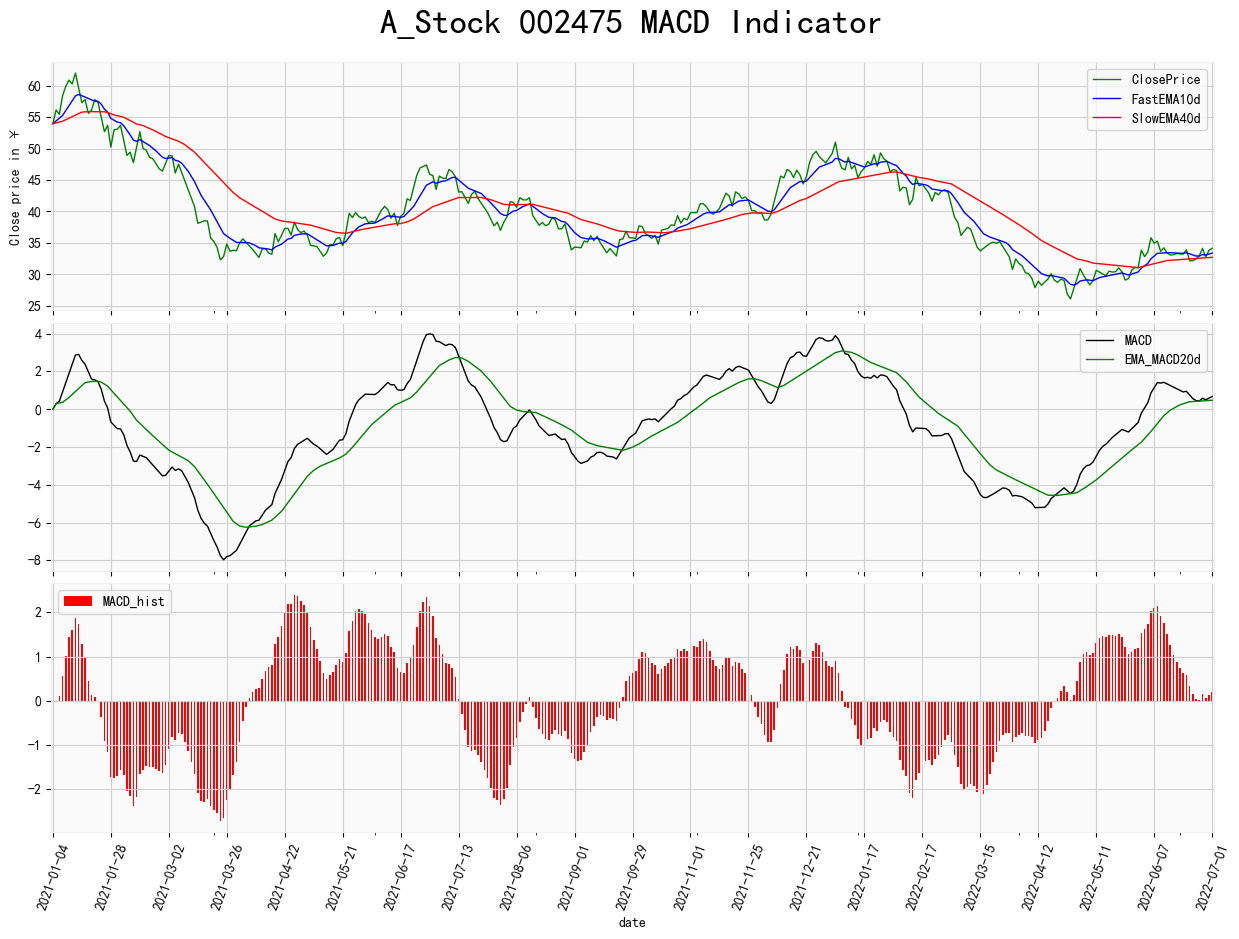

In [39]:
from datetime import datetime
import pylab as pl
import matplotlib as mpl


scale = len(df.index)
df = df_test

# EMA(Exponential Moving Average), 指数移动平均线
num_periods_fast = 10  # 快速EMA的时间周期，10
# K:平滑常数，常取2/(n+1)
K_fast = 2 / (num_periods_fast + 1)  # 快速EMA平滑常数
ema_fast = 0
num_periods_slow = 40  # 慢速EMA的时间周期，40
K_slow = 2 / (num_periods_slow + 1)  # 慢速EMA平滑常数
ema_slow = 0
num_periods_macd = 20  # MACD EMA的时间周期，20
K_macd = 2 / (num_periods_macd + 1)  # MACD EMA平滑常数
ema_macd = 0

ema_fast_values = []  
ema_slow_values = []  
macd_values = []  
macd_signal_values = []  
# MACD - MACD-EMA
MACD_hist_values = []  
for close_price in df['close']:
    if ema_fast == 0:  # 第一个值
        ema_fast = close_price
        ema_slow = close_price
    else:
        ema_fast = (close_price - ema_fast) * K_fast + ema_fast
        ema_slow = (close_price - ema_slow) * K_slow + ema_slow

    ema_fast_values.append(ema_fast)
    ema_slow_values.append(ema_slow)

	# MACD is fast_MA - slow_EMA
    macd = ema_fast - ema_slow  
    if ema_macd == 0:
        ema_macd = macd
    else:
    	# signal is EMA of MACD values
        ema_macd = (macd - ema_macd) * K_macd + ema_macd  
    macd_values.append(macd)
    macd_signal_values.append(ema_macd)
    MACD_hist_values.append(macd - ema_macd)

df = df.assign(ClosePrice=pd.Series(df['close'], index=df.index))
df = df.assign(FastEMA10d=pd.Series(ema_fast_values, index=df.index))
df = df.assign(SlowEMA40d=pd.Series(ema_slow_values, index=df.index))
df = df.assign(MACD=pd.Series(macd_values, index=df.index))
df = df.assign(EMA_MACD20d=pd.Series(macd_signal_values, index=df.index))
df = df.assign(MACD_hist=pd.Series(MACD_hist_values, index=df.index))

close_price = df['ClosePrice']
ema_f = df['FastEMA10d']
ema_s = df['SlowEMA40d']
macd = df['MACD']
ema_macd = df['EMA_MACD20d']
macd_hist = df['MACD_hist']

# 设置画布，纵向排列的三个子图
fig, ax = plt.subplots(3, 1, figsize = (15,10))


# 调整子图的间距，hspace表示高(height)方向的间距
plt.subplots_adjust(hspace=.05)

# 设置第一子图的y轴信息及标题

stock_code =  '002475'

ax[0].set_ylabel('Close price in ￥')
ax[0].set_title('A_Stock %s MACD Indicator' % stock_code, fontsize = 25, pad=20)
close_price.plot(ax=ax[0], color='g', lw=1., legend=True, use_index=False)
ema_f.plot(ax=ax[0], color='b', lw=1., legend=True, use_index=False)
ema_s.plot(ax=ax[0], color='r', lw=1., legend=True, use_index=False)

ax[1] = plt.subplot(312, sharex=ax[0])
macd.plot(ax=ax[1], color='k', lw=1., legend=True, sharex=ax[0], use_index=False)
ema_macd.plot(ax=ax[1], color='g', lw=1., legend=True, use_index=False)

ax[2] = plt.subplot(313, sharex=ax[0])
df['MACD_hist'].plot(ax=ax[2], color='r', kind='bar', legend=True, sharex=ax[0])

# 设置间隔，以便图形横坐标可以正常显示
interval = scale //20
Dates  = df['date'].to_list()

# 设置x轴参数，应用间隔设置
# 时间序列转换，(否则日期默认会显示时分秒数据00:00:00)
# x轴标签旋转便于显示
pl.xticks( [i for i in range(0, scale + 1, interval)],
          [(Dates[i]) for i in range (0, scale + 1, interval)], rotation = 70)
           
plt.show()

In [22]:
# correlation between five biggest stocks in Shanghai Stock Exchange
df_cor = pd.read_csv('./correlation.csv')
df_cor2= df_cor.iloc[:,2:]

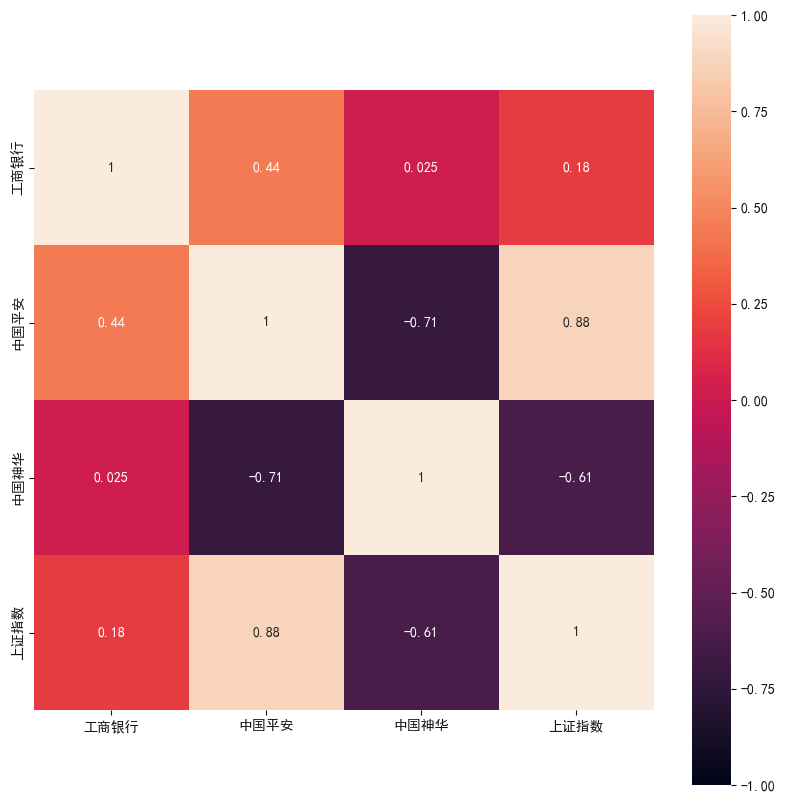

In [23]:
import seaborn as sns

df_cor2= df_cor.iloc[:,2:]
df_corr = df_cor2.corr()

plt.figure(1,figsize = (10,10) )
sns.heatmap(df_corr, annot=True,  vmax=1, vmin= -1, square=True) 
plt.show() 

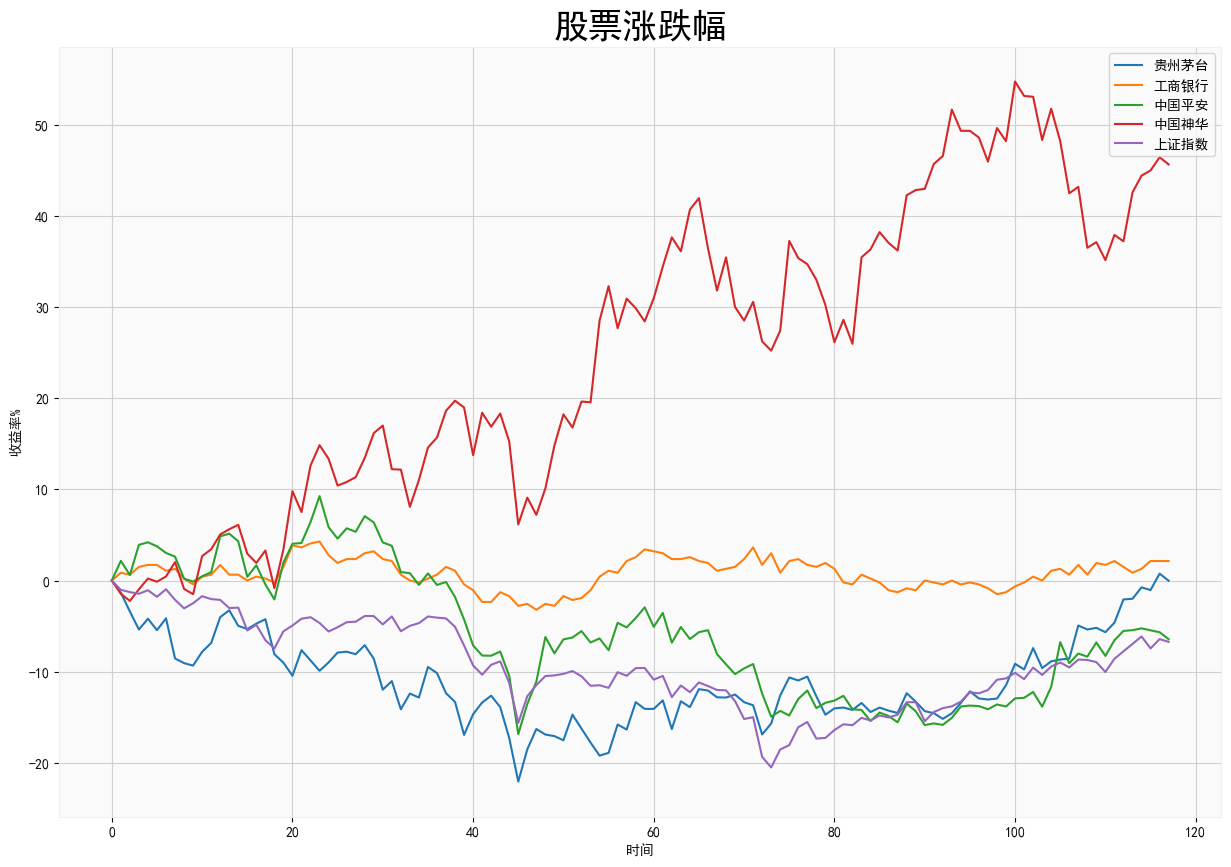

In [24]:
# ROI of the year
plt.figure(figsize = (15,10) )
def show(df, axs=None):
    n = []
    drawer = plt if axs is None else axs
    for i in df.columns:  # 遍历列名
        if i != '日期':
            n.append(i)
            drawer.plot(100*(df[i]/df[i].iloc[0]-1))  # 归一化处理
    drawer.grid(True)   # 显示网格
    drawer.legend(n, loc='best')   # 图例标注
    
show(df_cor)
plt.title('股票涨跌幅',fontsize =25)
plt.xlabel('时间')  # x轴时间
plt.ylabel('收益率%')  # y轴收收益率
plt.show()  # 显示图片